<div align='center'><h1>Post-operatory complication classification for kidney stones patients</h1><h6>Mouad NID-ABDELLAH, Ali IKKEN<br/>ENSA Berrechid</h6></div>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold , cross_val_score

## Data Exploration and cleaning

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_excel("complication data.xlsx")
df.head()

,Date,Unnamed: 1,location,sex,female,weight,size,BMI,BMI<30,BMI≥30,experience surgeon,hospitalisation stay,antecedent,antecedent.1,antecedent.2,analysis,discovery circumstance,nephritic colic,pain,blood,infection,obstruction,Sepsis,anuria,fortuitous,follow,antecedent lithiasis,residual fragment,residual fragment after,FR after PCNL,FR after SWL,FR after RIRS,FR after RIRS.1,failure,failure after,failure after SWL,Derivation,JJ,PCN,since,left,right,ureter lumbar,JPU,URETERE,Pyelon,TCS,TCM,TCI,CS,CM,CI,cavity middle,Cavity superior,Cavity inferior,KIDNEY,CM-CS-pyelon,multiple location,Number,Microfragments,Size Radio,Size Echo,sizeTDM,SIZE,<10mm,≥10mm <20mm,≥20 mm,complex,Type,density RX,Density TDM,CBU pré op,TTT,Nbre surgery,duration,RIRS Rétro/Ant,Dilatation,acces sheath,Extraction monobloc,Extraction fragments,laser kidney,Laser ureteral,LASER,Reloc pyélon,Reloc CS,RELOCALISATION,Frag complète,Frag incomplète,failure.1,Size 2,Location 3,hemorrhage,stenosis,Perforation,equipment,other,Drain post op,Mono J,Double J,Ablation,Complication per op,Type.1,Complication post op,Clavien I,Clavien II,Clavien III,Clavien Iva,Clavien V,fever,pain.1,blood.1,Renal Insuffince,hematoma,sepsis,IDM,rhabdomyolyse,IU,urinary globe,SF,not exploitable,n calcul total :,kidney (3 scores) :,CI :,n s CI :,CS/CM :,n s CM/CS :,pyelon :,u Proximal :,u distal :,size :,V calcul :,density,CI :.1,Angle IPA :,obstruction :,malformation :
0,2009.0,NaN,gauche,M,0,65.0,1.70,22.491349,1.0,0.0,25,2.0,myopathie,1,"CN, URS, LEC",NR,"CN, suivi",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,6.0,6,8.0,8.0,1.0,0.0,0.0,0.0,NaN,1,450.0,1.0,1.0,1.0,80.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,taille,1.0,0,0.0,0.0,0.0,0.0,0,1,0,1,37.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NaN,NaN,0,NaN,1,1,1,NaN,0,0,0,NaN,0,8.0,267.946667,450.0,1,70,1,NaN
1,2009.0,NaN,Gauche,M,0,77.0,1.74,25.432686,1.0,0.0,27,2.0,app,1,CN à répétition,NR,"CN, IU",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,1.0,1.0,0.0,58.0,1.0,0.0,0,0,0,0,1,0,0,0.0,0.0,0.0,0,1,0,1,1.0,0,1.0,0.0,NaN,NaN,13.0,13.0,0.0,1.0,0.0,1.0,incomplet,NaN,255.0,0.0,0.0,1.0,125.0,1,0.0,1.0,0.0,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,taille,1.0,0,0.0,0.0,0.0,0.0,0,1,0,1,20.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NaN,NaN,0,NaN,1,1,0,NaN,0,0,0,NaN,0,13.0,1149.763333,255.0,0,NaN,0,NaN
2,2009.0,NaN,Gauche,M,0,79.0,1.76,25.503616,1.0,0.0,83,3.0,"déficit fact IX, OP, polype colique, Berger, g...",1,greffe x2,"hypocitraturie, hyperoxalurie",hématurie,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,1.0,0.0,0,0,0,1,0,0,0,0.0,0.0,0.0,0,0,0,0,1.0,1,2.0,0.0,16.0,NaN,18.0,18.0,1.0,1.0,0.0,0.0,NaN,1,660.0,0.0,0.0,1.0,90.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,matériel,0.0,0,0.0,0.0,0.0,1.0,0,1,0,1,176.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NaN,NaN,0,NaN,2,1,0,NaN,0,0,1,NaN,0,18.0,3052.080000,660.0,0,NaN,1,NaN
3,2009.0,NaN,Gauche,M,0,74.0,1.77,23.620288,1.0,0.0,6,2.0,"SPA, varices, all iode, plastie JPU",1,"CN, plastie JPU",NR,"douleur lombaire, hématurie",0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,NaN,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,9.0,NaN,11.0,11.0,0.0,1.0,0.0,0.0,NaN,1,1330.0,0.0,0.0,1.0,120.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,28.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NaN,NaN,0,NaN,1,1,1,NaN,0,0,0,NaN,0,11.0,696.556667,1330.0,1,50,1,NaN
4,2009.0,NaN,Droite,M,0,80.0,0.00,NaN,0.0,0.0,85,7.0,"AVC, hémiparésie, dysphasie, HTA, sclérodermie...",1,Rein unique,"hypocitraturie, hypomagnésurie",CN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,1.0,1.0,0.0,58.0,0.0,1.0,0,0,0,1,0,0,0,0.0,0.0,0.0,0,0,0,1,1.0,0,1.0,0.0,8.0,NaN,10.0,10.0,0.0,1.0,0.0,0.0,NaN,1,850.0,1.0,0.0,1.0,55.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1

In [3]:
df.shape

(669, 136)

In [4]:
# deleting the spaces at the beginning and end of column names.
lst = df.columns
lst = [i.strip() for i in lst]
df.columns = lst

In [5]:
# printing the name columns that contains more than 100 null value.
counts = df.isna().sum().to_frame()
counts.columns = ["count"]
indexes = counts.loc[counts['count'] > 100].index
print(indexes.tolist())
print(len(indexes))

['Unnamed: 1', 'analysis', 'since', 'Size Radio', 'Size Echo', 'Type', 'density RX', 'Ablation', 'IU', 'urinary globe', 'not exploitable', 'n s CI :', 'u Proximal :', 'Angle IPA :', 'malformation :']
15


In [6]:
# deleting the columns that have more than 100 null value.
df.drop(indexes, axis=1, inplace=True)
df.head()

,Date,location,sex,female,weight,size,BMI,BMI<30,BMI≥30,experience surgeon,hospitalisation stay,antecedent,antecedent.1,antecedent.2,discovery circumstance,nephritic colic,pain,blood,infection,obstruction,Sepsis,anuria,fortuitous,follow,antecedent lithiasis,residual fragment,residual fragment after,FR after PCNL,FR after SWL,FR after RIRS,FR after RIRS.1,failure,failure after,failure after SWL,Derivation,JJ,PCN,left,right,ureter lumbar,JPU,URETERE,Pyelon,TCS,TCM,TCI,CS,CM,CI,cavity middle,Cavity superior,Cavity inferior,KIDNEY,CM-CS-pyelon,multiple location,Number,Microfragments,sizeTDM,SIZE,<10mm,≥10mm <20mm,≥20 mm,complex,Density TDM,CBU pré op,TTT,Nbre surgery,duration,RIRS Rétro/Ant,Dilatation,acces sheath,Extraction monobloc,Extraction fragments,laser kidney,Laser ureteral,LASER,Reloc pyélon,Reloc CS,RELOCALISATION,Frag complète,Frag incomplète,failure.1,Size 2,Location 3,hemorrhage,stenosis,Perforation,equipment,other,Drain post op,Mono J,Double J,Complication per op,Type.1,Complication post op,Clavien I,Clavien II,Clavien III,Clavien Iva,Clavien V,fever,pain.1,blood.1,Renal Insuffince,hematoma,sepsis,IDM,rhabdomyolyse,SF,n calcul total :,kidney (3 scores) :,CI :,CS/CM :,n s CM/CS :,pyelon :,u distal :,size :,V calcul :,density,CI :.1,obstruction :
0,2009.0,gauche,M,0,65.0,1.70,22.491349,1.0,0.0,25,2.0,myopathie,1,"CN, URS, LEC","CN, suivi",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,8.0,8.0,1.0,0.0,0.0,0.0,450.0,1.0,1.0,1.0,80.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,taille,1.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,8.0,267.946667,450.0,1,1
1,2009.0,Gauche,M,0,77.0,1.74,25.432686,1.0,0.0,27,2.0,app,1,CN à répétition,"CN, IU",1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0.0,0.0,0.0,0,1,0,1,1.0,0,1.0,0.0,13.0,13.0,0.0,1.0,0.0,1.0,255.0,0.0,0.0,1.0,125.0,1,0.0,1.0,0.0,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,taille,1.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,0,0,0,0,0,13.0,1149.763333,255.0,0,0
2,2009.0,Gauche,M,0,79.0,1.76,25.503616,1.0,0.0,83,3.0,"déficit fact IX, OP, polype colique, Berger, g...",1,greffe x2,hématurie,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0.0,0.0,0.0,0,0,0,0,1.0,1,2.0,0.0,18.0,18.0,1.0,1.0,0.0,0.0,660.0,0.0,0.0,1.0,90.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,matériel,0.0,0,0.0,0.0,0.0,1.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,2,1,0,0,0,1,0,18.0,3052.080000,660.0,0,1
3,2009.0,Gauche,M,0,74.0,1.77,23.620288,1.0,0.0,6,2.0,"SPA, varices, all iode, plastie JPU",1,"CN, plastie JPU","douleur lombaire, hématurie",0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,11.0,11.0,0.0,1.0,0.0,0.0,1330.0,0.0,0.0,1.0,120.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,11.0,696.556667,1330.0,1,1
4,2009.0,Droite,M,0,80.0,0.00,NaN,0.0,0.0,85,7.0,"AVC, hémiparésie, dysphasie, HTA, sclérodermie...",1,Rein unique,CN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0.0,0.0,0.0,0,0,0,1,1.0,0,1.0,0.0,10.0,10.0,0.0,1.0,0.0,0.0,850.0,1.0,0.0,1.0,55.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,1,1,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,0,0,0,1,0,10.0,523.333333,850.0,0,0


In [7]:
# deleting lines that have null values
df.dropna(inplace=True)
df.shape

(432, 121)

In [8]:
# deleting duplicate columns
col_lst = ['female','BMI<30','BMI≥30','<10mm', '≥10mm <20mm','≥20 mm', 'sizeTDM', 'Date',
           'size  :', 'failure.1', 'hospitalisation stay']
df.drop(col_lst, axis=1, inplace=True)
df.head()

,location,sex,weight,size,BMI,experience surgeon,antecedent,antecedent.1,antecedent.2,discovery circumstance,nephritic colic,pain,blood,infection,obstruction,Sepsis,anuria,fortuitous,follow,antecedent lithiasis,residual fragment,residual fragment after,FR after PCNL,FR after SWL,FR after RIRS,FR after RIRS.1,failure,failure after,failure after SWL,Derivation,JJ,PCN,left,right,ureter lumbar,JPU,URETERE,Pyelon,TCS,TCM,TCI,CS,CM,CI,cavity middle,Cavity superior,Cavity inferior,KIDNEY,CM-CS-pyelon,multiple location,Number,Microfragments,SIZE,complex,Density TDM,CBU pré op,TTT,Nbre surgery,duration,RIRS Rétro/Ant,Dilatation,acces sheath,Extraction monobloc,Extraction fragments,laser kidney,Laser ureteral,LASER,Reloc pyélon,Reloc CS,RELOCALISATION,Frag complète,Frag incomplète,Size 2,Location 3,hemorrhage,stenosis,Perforation,equipment,other,Drain post op,Mono J,Double J,Complication per op,Type.1,Complication post op,Clavien I,Clavien II,Clavien III,Clavien Iva,Clavien V,fever,pain.1,blood.1,Renal Insuffince,hematoma,sepsis,IDM,rhabdomyolyse,SF,n calcul total :,kidney (3 scores) :,CI :,CS/CM :,n s CM/CS :,pyelon :,u distal :,V calcul :,density,CI :.1,obstruction :
0,gauche,M,65.0,1.70,22.491349,25,myopathie,1,"CN, URS, LEC","CN, suivi",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,8.0,0.0,450.0,1.0,1.0,1.0,80.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,267.946667,450.0,1,1
2,Gauche,M,79.0,1.76,25.503616,83,"déficit fact IX, OP, polype colique, Berger, g...",1,greffe x2,hématurie,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0.0,0.0,0.0,0,0,0,0,1.0,1,2.0,0.0,18.0,0.0,660.0,0.0,0.0,1.0,90.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,2,1,0,0,0,1,0,3052.080000,660.0,0,1
3,Gauche,M,74.0,1.77,23.620288,6,"SPA, varices, all iode, plastie JPU",1,"CN, plastie JPU","douleur lombaire, hématurie",0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,11.0,0.0,1330.0,0.0,0.0,1.0,120.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,696.556667,1330.0,1,1
6,Droite,F,80.0,1.57,32.455678,88,non,1,"cancer rein droit, tumorectomie, lithi récidiv...",suivi,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,24.0,1.0,500.0,1.0,1.0,1.0,180.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,7234.560000,500.0,1,1
8,Gauche,M,82.0,1.64,30.487805,8,"HTA, SAS, diabète, bicytopénie, IDM, arthite c...",1,"PR, orchidectomie, maladie lithiasique",infection,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,14.0,0.0,1050.0,1.0,0.0,1.0,160.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,1436.026667,1050.0,1,1


In [9]:
df.rename(columns={'SIZE': 'sizeTDM'}, inplace =True)

#### 1.Coding categorical variables

In [10]:
df['antecedent01'] = 0
df['antecedent01'] = np.where((df['antecedent'] != 0) & (df['antecedent.1'] != 0) & (df['antecedent.2'] != 0), 1,
                              df['antecedent01'])

df.head()

,location,sex,weight,size,BMI,experience surgeon,antecedent,antecedent.1,antecedent.2,discovery circumstance,nephritic colic,pain,blood,infection,obstruction,Sepsis,anuria,fortuitous,follow,antecedent lithiasis,residual fragment,residual fragment after,FR after PCNL,FR after SWL,FR after RIRS,FR after RIRS.1,failure,failure after,failure after SWL,Derivation,JJ,PCN,left,right,ureter lumbar,JPU,URETERE,Pyelon,TCS,TCM,TCI,CS,CM,CI,cavity middle,Cavity superior,Cavity inferior,KIDNEY,CM-CS-pyelon,multiple location,Number,Microfragments,sizeTDM,complex,Density TDM,CBU pré op,TTT,Nbre surgery,duration,RIRS Rétro/Ant,Dilatation,acces sheath,Extraction monobloc,Extraction fragments,laser kidney,Laser ureteral,LASER,Reloc pyélon,Reloc CS,RELOCALISATION,Frag complète,Frag incomplète,Size 2,Location 3,hemorrhage,stenosis,Perforation,equipment,other,Drain post op,Mono J,Double J,Complication per op,Type.1,Complication post op,Clavien I,Clavien II,Clavien III,Clavien Iva,Clavien V,fever,pain.1,blood.1,Renal Insuffince,hematoma,sepsis,IDM,rhabdomyolyse,SF,n calcul total :,kidney (3 scores) :,CI :,CS/CM :,n s CM/CS :,pyelon :,u distal :,V calcul :,density,CI :.1,obstruction :,antecedent01
0,gauche,M,65.0,1.70,22.491349,25,myopathie,1,"CN, URS, LEC","CN, suivi",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,8.0,0.0,450.0,1.0,1.0,1.0,80.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,267.946667,450.0,1,1,1
2,Gauche,M,79.0,1.76,25.503616,83,"déficit fact IX, OP, polype colique, Berger, g...",1,greffe x2,hématurie,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0.0,0.0,0.0,0,0,0,0,1.0,1,2.0,0.0,18.0,0.0,660.0,0.0,0.0,1.0,90.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,2,1,0,0,0,1,0,3052.080000,660.0,0,1,1
3,Gauche,M,74.0,1.77,23.620288,6,"SPA, varices, all iode, plastie JPU",1,"CN, plastie JPU","douleur lombaire, hématurie",0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,11.0,0.0,1330.0,0.0,0.0,1.0,120.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,696.556667,1330.0,1,1,1
6,Droite,F,80.0,1.57,32.455678,88,non,1,"cancer rein droit, tumorectomie, lithi récidiv...",suivi,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,24.0,1.0,500.0,1.0,1.0,1.0,180.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,7234.560000,500.0,1,1,1
8,Gauche,M,82.0,1.64,30.487805,8,"HTA, SAS, diabète, bicytopénie, IDM, arthite c...",1,"PR, orchidectomie, maladie lithiasique",infection,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0.0,0,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0,0,1,1,0.0,0,1.0,0.0,14.0,0.0,1050.0,1.0,0.0,1.0,160.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,1,1,0,0,0,0,1436.026667,1050.0,1,1,1


In [11]:
df['antecedent01'].value_counts()

1    253
0    179
Name: antecedent01, dtype: int64

In [12]:
df.drop(['antecedent', 'antecedent.1', 'antecedent.2'], axis=1, inplace=True)

In [13]:
df['sex'].value_counts()

M    208
F    133
m     35
f     31
H     24
h      1
Name: sex, dtype: int64

In [14]:
df.sex.replace("H", 1, inplace=True)
df.sex.replace("m", 1, inplace=True)
df.sex.replace("h", 1, inplace=True)
df.sex.replace("M", 1, inplace=True)

df.sex.replace("f", 0, inplace=True)
df.sex.replace("F", 0, inplace=True)
df.sex.replace("F ", 0, inplace=True)

In [15]:
df['sex'].value_counts()

1    268
0    164
Name: sex, dtype: int64

In [16]:
df['location'].value_counts()

Gauche        176
Droite        153
gauche         46
droite         42
Bilatérale     11
gauche          1
droit           1
bilaterale      1
GAUCHE          1
Name: location, dtype: int64

In [17]:
index = df[(df['location'] == 0) | (df['location'] == 'greffon')].index
df.drop(index, inplace=True)

In [18]:
df['location'].replace("Gauche", 1, inplace=True)
df['location'].replace("gauche", 1, inplace=True)
df['location'].replace("gauche ", 1, inplace=True)
df['location'].replace("GAUCHE", 1, inplace=True)
df['location'].replace("Droite", 2, inplace=True)
df['location'].replace("droite", 2, inplace=True)
df['location'].replace("droit", 2, inplace=True)
df['location'].replace("Bilatérale", 0, inplace=True)
df['location'].replace("bilaterale", 0, inplace=True)
df['location'].value_counts()

1    224
2    196
0     12
Name: location, dtype: int64

In [19]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 663
Data columns (total 108 columns):
 #    Column                   Non-Null Count  Dtype  
---   ------                   --------------  -----  
 0    location                 432 non-null    int64  
 1    sex                      432 non-null    int64  
 2    weight                   432 non-null    float64
 3    size                     432 non-null    float64
 4    BMI                      432 non-null    float64
 5    experience surgeon       432 non-null    int64  
 6    discovery circumstance   432 non-null    object 
 7    nephritic colic          432 non-null    object 
 8    pain                     432 non-null    float64
 9    blood                    432 non-null    float64
 10   infection                432 non-null    float64
 11   obstruction              432 non-null    float64
 12   Sepsis                   432 non-null    float64
 13   anuria                   432 non-null    float64
 14   fortuito

<ipython-input-19-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [20]:
# Grouping the columns that contains calsse of the complication into one column called Target we'll be deleting
# these columns also

df['Target'] = 0
df['Target'] = np.where(df['Clavien I'] == 1, 1, df['Target'])
df['Target'] = np.where(df['Clavien II'] == 1, 2, df['Target'])
df['Target'] = np.where(df['Clavien III'] == 1, 3, df['Target'])
df['Target'] = np.where(df['Clavien Iva'] == 1, 4, df['Target'])
df['Target'] = np.where(df['Clavien V'] == 1, 5, df['Target'])
df['Target'].value_counts()

0    389
1     20
2     19
3      3
5      1
Name: Target, dtype: int64

In [21]:
df.drop(['Complication post op', 'Clavien I', 'Clavien II', 'Clavien III', 
         'Clavien Iva', 'Clavien V', 'failure', 'failure after', 'failure after SWL'],
        axis=1, inplace=True)
df.shape

(432, 100)

In [22]:
df['nephritic colic'].value_counts()

0    269
1    163
Name: nephritic colic, dtype: int64

In [23]:
df['residual fragment'].value_counts()

0       304
1       127
NLPC      1
Name: residual fragment, dtype: int64

In [24]:
df['residual fragment'].replace("NLPC", 2, inplace=True)
df['nephritic colic'].replace("Suivi", 2, inplace=True)

In [25]:
df['residual fragment after'].value_counts()

0              297
URSS            57
LEC             33
1               26
NLPC             8
URSR             2
URSS + LEC       2
LEC+URSR         1
NLPC, URSS       1
urs              1
NLPC, LEC        1
urss             1
URSS + NLPC      1
NLPC + URSS      1
Name: residual fragment after, dtype: int64

In [26]:
df['residual fragment after'].replace("URSS", 2, inplace=True)
df['residual fragment after'].replace("urss", 2, inplace=True)
df['residual fragment after'].replace("LEC", 3, inplace=True)
df['residual fragment after'].replace("NLPC", 4, inplace=True)
df['residual fragment after'].replace("URSR", 5, inplace=True)

df['residual fragment after'].replace("URSS + LEC", 6, inplace=True)
df['residual fragment after'].replace("LEC+URSR", 9, inplace=True)

df['residual fragment after'].replace("NLPC, LEC", 7, inplace=True)

df['residual fragment after'].replace("NLPC + URSS", 8, inplace=True)
df['residual fragment after'].replace("NLPC, URSS", 8, inplace=True)
df['residual fragment after'].replace("URSS + NLPC", 8, inplace=True)

df['residual fragment after'].replace("NLPC, URSS, LEC", 10, inplace=True)

index = df[(df['residual fragment after'] == 'urs')].index
df.drop(index, inplace=True)

In [27]:
df['Location 3'].value_counts()

0           416
1            14
pyélique      1
Name: Location 3, dtype: int64

In [28]:
df['Location 3'].replace("CS", 2, inplace=True)
df['Location 3'].replace("pyélique", 3, inplace=True)

In [29]:
df["Type.1"].value_counts()

0                                     419
s febrile                               3
vomissements et douleurs                1
stenose ureterale                       1
douleurs                                1
fx trajet                               1
prostatite                              1
hématurie par caillotage de la VES      1
choc septique                           1
PNA + douleurs                          1
neuro: AVC ischémique à J0              1
Name: Type.1, dtype: int64

In [30]:
df["Type.1"].replace("s febrile ", 1, inplace=True)
df["Type.1"].replace("vomissements et douleurs", 2, inplace=True)
df["Type.1"].replace("RAU sur caillotage sous anticoagulation efficace", 3, inplace=True)
df["Type.1"].replace("fx trajet", 4, inplace=True)
df["Type.1"].replace("douleurs", 5, inplace=True)
df["Type.1"].replace("stenose ureterale", 6, inplace=True)
df["Type.1"].replace("prostatite", 7, inplace=True)
df["Type.1"].replace("PNA", 8, inplace=True)
df["Type.1"].replace("PNA + douleurs", 9, inplace=True)
df["Type.1"].replace("neuro: AVC ischémique à J0", 10, inplace=True)
df["Type.1"].replace("choc septique", 11, inplace=True)
df["Type.1"].replace("hématurie par caillotage de la VES", 12, inplace=True)

In [31]:
df['other'].unique()

array([0, 1, 'brêche urétérale', 'mauvaise visibilité',
       'mouvements respiratoires amples', 'durée et visibilité'],
      dtype=object)

In [32]:
df["other"].replace("brêche urétérale", 2, inplace=True)
df["other"].replace("mauvaise visibilité", 3, inplace=True)
df["other"].replace("mouvements respiratoires amples", 4, inplace=True)
df["other"].replace("durée et visibilité", 5, inplace=True)
df["other"].replace("visibilité", 6, inplace=True)
df["other"].replace("bifidité ureterale", 7, inplace=True)
df["other"].replace("temps", 8, inplace=True)

In [33]:
df['FR after RIRS'].value_counts()

0    425
1      5
`      1
Name: FR after RIRS, dtype: int64

In [34]:
index = df[(df['FR after RIRS'] == '`')].index
df.drop(index, inplace=True)

In [35]:
df['discovery circumstance'].unique()

array(['CN, suivi', 'hématurie', 'douleur lombaire, hématurie', 'suivi',
       'infection', 'CN, hématurie', 'PNO, sepsis', 'suivi pour FR',
       'fortuite, 3° temps', 'CN', 'infection urinaire',
       'fortuite, 2° temps', 'Fortuite', 'douleurs', 'PNO', 1, 0, 'Suivi',
       'PNAO', 'Protéinurie', 'lombalgie', 'fortuite', 'cna simple',
       'PNAO ', 'frag incomplete', 'cna', 'echec lec ',
       'decouverte fortuite', 'bilan hematurie', 'pnao', '2sd temps urss',
       'urs 2eme temps ', 'choc septique', 'urs 2emetemps',
       '2eme temps urss', 'urs 3emetemps', 'suivi controlat',
       'hematurie0', 'CN, douleur lombaire', 'douleur lombaire', 'IU',
       'infection urinaire, suivi', 'Hematurie', 'inf urinaire',
       'Septicémie', 'cn', 'Hématurie', 'PNO emphysémateuse',
       'découvert sur douleurs abdo', 'douleurs lombaire, hématurie',
       'cna ', '2sd temps', 'cna gauche hyperalgique', 'echec lec',
       'suivi, anxieté', 'post lec ', 'cna hyperalgique',
       'CN

In [36]:
df.drop(['discovery circumstance'], axis=1, inplace=True)

In [37]:
df.Target.value_counts()

0    387
1     20
2     19
3      3
5      1
Name: Target, dtype: int64

In [38]:
# deleting classe 3 and 5 because they doesn't contain enough records so we can apply overssampling on them.
index = df[((df['Target'] == 3) | (df['Target'] == 5))].index
df.drop(index, inplace=True)

In [39]:
df.shape

(426, 99)

#### 2. Classes distribution

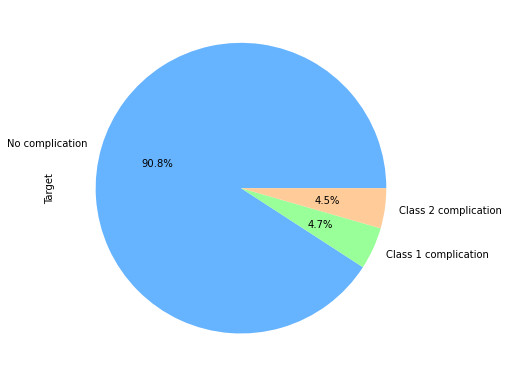

In [40]:
plt.figure(figsize=(7,7))
df.Target.value_counts().plot(kind='pie', autopct='%.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'],
                              labels=['No complication', 'Class 1 complication', 'Class 2 complication'])
plt.tight_layout()
plt.show()

In [41]:
# saving the cleaned data to a new wxcel file
df.to_excel('./Cleaned data.xlsx')

In [42]:
df = pd.read_excel('./Cleaned data.xlsx')
df.shape

(426, 100)

In [43]:
X = df.drop(['Target'], axis=1)
y = df['Target']

#### 3. Oversampling the minority classes

<AxesSubplot:>

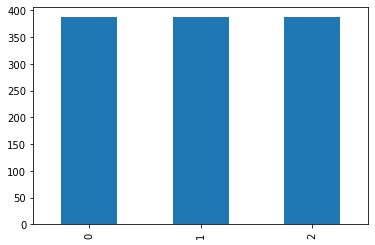

In [44]:
from imblearn.over_sampling import SMOTE
os_X, os_y = SMOTE(random_state=20).fit_resample(X, y)
os_y.value_counts().plot(kind='bar')

#### 4. Feature selection

    4.a. Mutual information

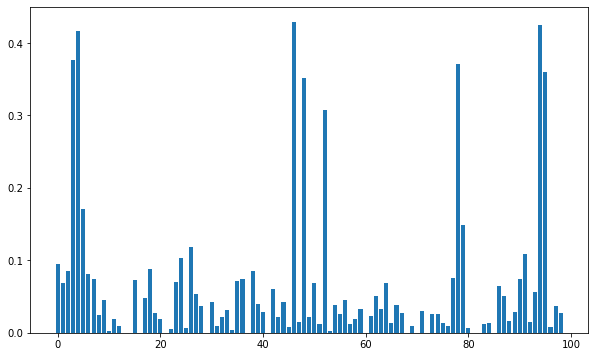

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC

mi_score = MIC(os_X, os_y)
plt.figure(figsize=(10,6))
plt.bar([i for i in range(len(mi_score))], mi_score)
plt.show()

In [46]:
# keeping only variables that have score bigger that 0.08.
mi_score_selected_index = np.where(mi_score > 0.08)[0]
print("The number of extracted feautures is:",len(mi_score_selected_index))
X_2 = X.iloc[:,mi_score_selected_index]

# storing the extracted variables list in dictionnary.
Columns_lists = {}
Columns_lists['filter'] = X_2.columns

The number of extracted feautures is: 18


    4.b Embedded method

In [48]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators = 200).fit(os_X, os_y)

In [49]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =os_X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
fever,0.133741
pain.1,0.049524
JJ,0.040138
density,0.037081
Density TDM,0.035876
...,...
kidney (3 scores) :,0.000000
IDM,0.000000
Perforation,0.000000
hematoma,0.000000


In [52]:
# extracted variables that have an importance value bigger that 0.015.
columns = feature_importances[feature_importances['importance'] > 0.015].index
print("The number of extracted feautures is:",len(columns))

The number of extracted feautures is: 23


<Figure size 720x432 with 0 Axes>

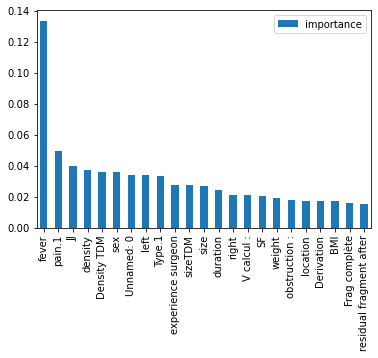

In [54]:
plt.figure(figsize=(10,6))
feature_importances.loc[columns].plot(kind='bar')
plt.show()

In [55]:
Columns_lists['Embeded'] = columns

    4.c Wrapper method (SFS)

In [57]:
%%time
sfs = SFS(RandomForestClassifier(),
           k_features=20,
           forward=True,
           floating=False,
           scoring = 'accuracy',
           cv = 0)
sfs = sfs.fit(os_X, os_y)
# print the selected features.
selected_features = os_X.columns[list(sfs.k_feature_idx_)]
score = sfs.k_score_

Wall time: 9min 41s


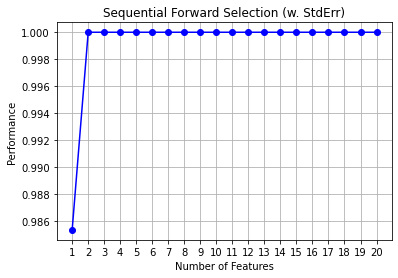

In [63]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [108]:
Columns_lists['Wrapper'] = selected_features

In [109]:
# printing the dictionary that contains the column list issued by each method
Columns_lists

{'filter': Index(['Unnamed: 0', 'weight', 'size', 'BMI', 'experience surgeon', 'JJ',
        'left', 'sizeTDM', 'Density TDM', 'duration', 'Reloc CS', 'Type.1',
        'fever', 'pain.1', 'SF', 'V calcul :', 'density'],
       dtype='object'),
 'Embeded': Index(['fever', 'pain.1', 'JJ', 'density', 'Density TDM', 'sex', 'Unnamed: 0',
        'left', 'Type.1', 'experience surgeon', 'sizeTDM', 'size', 'duration',
        'right', 'V calcul :', 'SF', 'weight', 'obstruction :', 'location',
        'Derivation', 'BMI', 'Frag complète', 'residual fragment after'],
       dtype='object'),
 'Wrapper': Index(['Unnamed: 0', 'location', 'sex', 'weight', 'size', 'BMI',
        'experience surgeon', 'nephritic colic', 'pain', 'blood', 'infection',
        'obstruction', 'Sepsis', 'anuria', 'fortuitous', 'follow',
        'antecedent lithiasis', 'residual fragment', 'residual fragment after',
        'FR after PCNL'],
       dtype='object')}

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
# creating a list of models. So we can each feature selection method on each model.
# this procedure will enable us to find the list of columns that is most suited for each model.
models =[]
models.append(('KNNC', KNeighborsClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', svm.SVC()))
results =[]
for method, columns in Columns_lists.items():
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=20,shuffle=True)
        cv_results = cross_val_score(model, os_X[columns], os_y, cv=kfold, scoring='accuracy')
        results.append((name, method, cv_results))

[14:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[14:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [112]:
from statistics import mean
results2 = []
for name, method, res in results :
    results2.append((name , method , mean(res)))

[('KNNC', 'filter', 0.7725832596522252),
 ('XGB', 'filter', 0.9776009431181845),
 ('RF', 'filter', 0.9724285293250811),
 ('SVM', 'filter', 0.4168287651046272),
 ('KNNC', 'Embeded', 0.7725832596522252),
 ('XGB', 'Embeded', 0.9844974948423224),
 ('RF', 'Embeded', 0.9853521956970233),
 ('SVM', 'Embeded', 0.4159666961391099),
 ('KNNC', 'Wrapper', 0.7337606837606838),
 ('XGB', 'Wrapper', 0.9164235190097259),
 ('RF', 'Wrapper', 0.9267830828175656),
 ('SVM', 'Wrapper', 0.5650014736221632)]

In [113]:
dfNames = pd.DataFrame(results2 ,columns = ["Model","Method","Mean"] )
dfNames

,Model,Method,Mean
0,KNNC,filter,0.772583
1,XGB,filter,0.977601
2,RF,filter,0.972429
3,SVM,filter,0.416829
4,KNNC,Embeded,0.772583
5,XGB,Embeded,0.984497
6,RF,Embeded,0.985352
7,SVM,Embeded,0.415967
8,KNNC,Wrapper,0.733761
9,XGB,Wrapper,0.916424


In [114]:
# creating a dataframe that contains the performance of each model on each feature selection method
dfNames2 = dfNames.pivot_table(index='Model', columns='Method', values='Mean')
dfNames2

Method,Embeded,Wrapper,filter
Model,,,
KNNC,0.772583,0.733761,0.772583
RF,0.985352,0.926783,0.972429
SVM,0.415967,0.565001,0.416829
XGB,0.984497,0.916424,0.977601


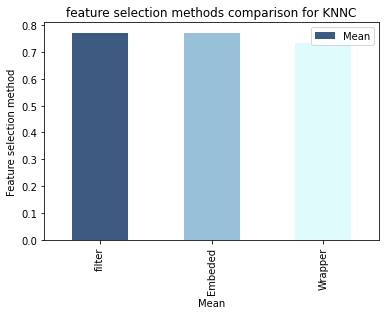

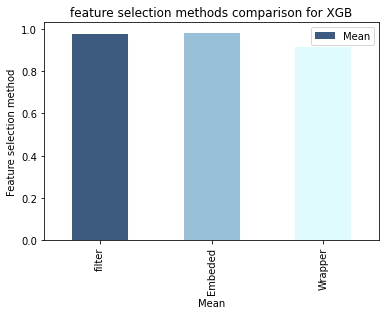

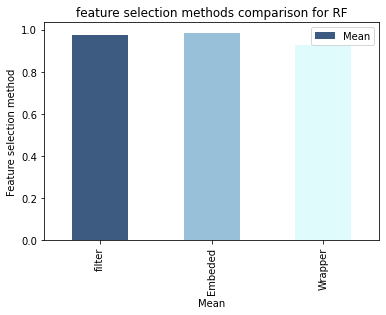

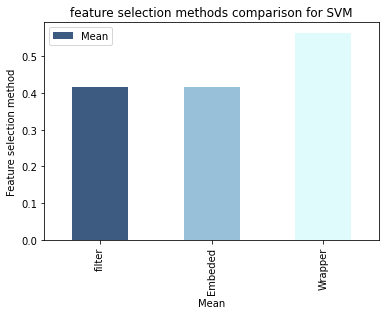

In [115]:
# plotting the performance of each model on the tree column lists.
for model in dfNames['Model'].unique():
    dfNames[dfNames['Model'] == model].plot(kind='bar', x='Method', y='Mean', color=['#3d5a80', '#98c1d9', '#e0fbfc'])
    plt.title('feature selection methods comparison for '+model)
    plt.ylabel('Feature selection method')
    plt.xlabel('Mean')

#### 5. Hyper parameter tunning

    5.a kNN

In [62]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,5))
n_neighbors = list(range(1,10))
p=[1,2]


hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(os_X[Columns_lists['filter']],os_y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


    5.b SVM

In [63]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm1 = svm.SVC()
grid = GridSearchCV(svm1, param_grid, refit = True)
 
# fitting the model for grid search
best_model = grid.fit(os_X[Columns_lists['Wrapper']], os_y)
#Print The value of best Hyperparameters
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])

Best C: 10
Best gamma: 0.01
Best kernel: rbf


    5.c XGBoost

In [64]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, gamma=0, subsample=0.8,
                                                  colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, seed=27),
                        param_grid = param_test2, n_jobs=-1, cv=3)


best_model = gsearch2.fit(os_X[Columns_lists['Embeded']],os_y)
#Print The value of best Hyperparameters
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('BestMin_child_weigth:', best_model.best_estimator_.get_params()['min_child_weight'])

[21:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best max_depth: 4
BestMin_child_weigth: 6


    5.e Random forest

In [65]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1)


best_model = grid_search.fit(os_X[Columns_lists['Embeded']], os_y)
#Print The value of best Hyperparameters
print('Best bootstrap :', best_model.best_estimator_.get_params()['bootstrap'])
print('Best max_depth :', best_model.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])

Best bootstrap : True
Best max_depth : 90
Best max_features: 2
Best min_samples_leaf: 3
Best min_samples_split: 8
Best n_estimators: 100


#### 6. Models evaluation

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(os_X, os_y, test_size=0.15, stratify=os_y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((986, 99), (175, 99), (986,), (175,))

In [123]:
knn = KNeighborsClassifier(leaf_size= 1, p = 1, n_neighbors = 1)
knn.fit(X_train[Columns_lists['filter']],y_train)
print(knn.score(X_test[Columns_lists['filter']], y_test))
knn_predictions = knn.predict(X_test[Columns_lists['filter']])

0.8457142857142858


In [124]:
svm1 = svm.SVC(C=10, gamma=0.01, kernel='rbf', probability=True)
svm1.fit(X_train[Columns_lists['Wrapper']],y_train)
print(svm1.score(X_test[Columns_lists['Wrapper']], y_test))
svm1_predictions = svm1.predict(X_test[Columns_lists['Wrapper']])

0.8114285714285714


In [125]:
rf = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10,
                           n_estimators=100)
rf.fit(X_train[Columns_lists['Embeded']],y_train)
print(rf.score(X_test[Columns_lists['Embeded']], y_test))
rf_predictions = rf.predict(X_test[Columns_lists['Embeded']])

0.96


In [126]:
xb = XGBClassifier( learning_rate=0.1, n_estimators=140, gamma=0, subsample=0.8,
                   colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, seed=27, max_depth=4)
xb.fit(X_train[Columns_lists['Embeded']],y_train)
print(xb.score(X_test[Columns_lists['Embeded']], y_test))
xb_predictions = xb.predict(X_test[Columns_lists['Embeded']])

[14:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9657142857142857


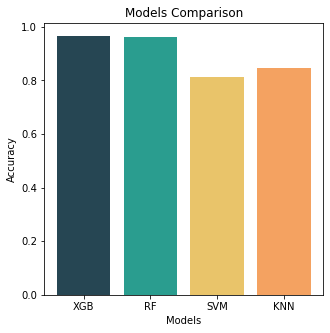

In [127]:
scores = [xb.score(X_test[Columns_lists['Embeded']], y_test), rf.score(X_test[Columns_lists['Embeded']], y_test),
svm1.score(X_test[Columns_lists['Wrapper']], y_test), knn.score(X_test[Columns_lists['filter']], y_test)]
models = ['XGB', 'RF', 'SVM', 'KNN']
plt.figure(figsize=(5,5))
plt.bar(models, scores, color =['#264653', '#2a9d8f', '#e9c46a', '#f4a261'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Comparison')
plt.show()

Model Accuracy :  0.8457142857142858
Precision on testing set: 0.8463235294117647
Recall on testing set: 0.8463861289694137


[Text(0, 0.5, 'No complication'),
 Text(0, 1.5, 'Class 1 complication'),
 Text(0, 2.5, 'Class 2 complication')]

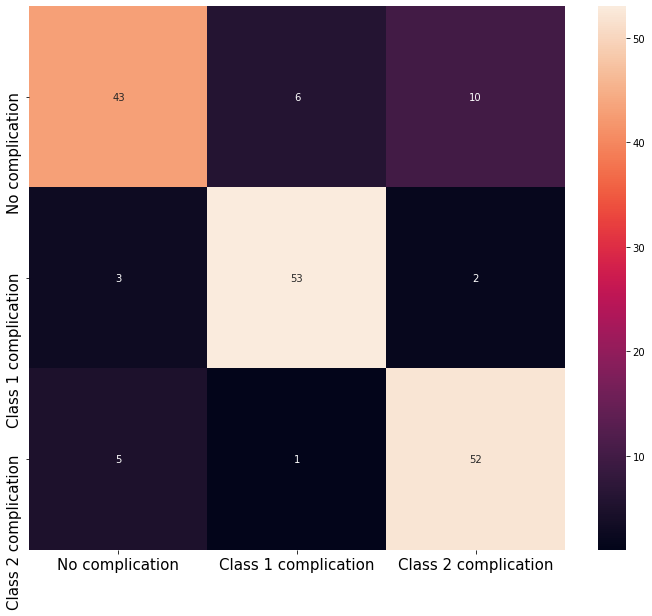

In [141]:
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions, average='macro')
recall = recall_score(y_test, knn_predictions, average='macro')

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)
graph = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph, annot=True, ax = ax)
ax.xaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)
ax.yaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)

Model Accuracy :  0.8114285714285714
Precision on testing set: 0.8166105499438833
Recall on testing set: 0.81131891681278


[Text(0, 0.5, 'No complication'),
 Text(0, 1.5, 'Class 1 complication'),
 Text(0, 2.5, 'Class 2 complication')]

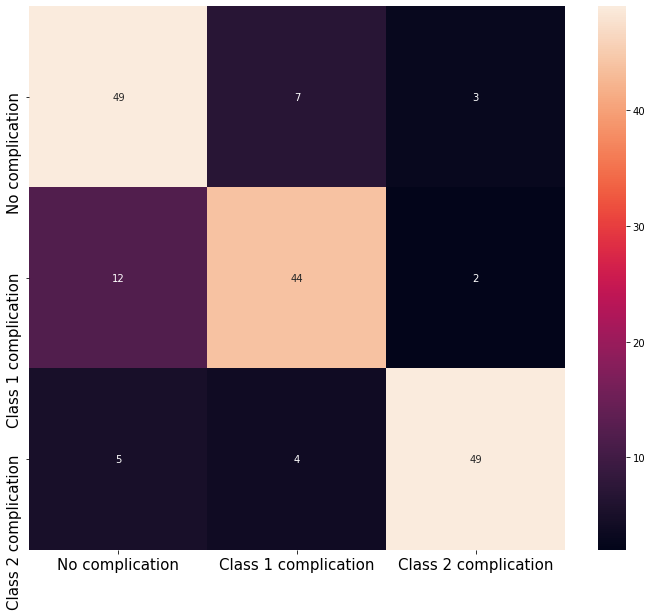

In [140]:
accuracy = accuracy_score(y_test, svm1_predictions)
precision = precision_score(y_test, svm1_predictions, average='macro')
recall = recall_score(y_test, svm1_predictions, average='macro')

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)
graph = confusion_matrix(y_test, svm1_predictions)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph, annot=True, ax = ax)
ax.xaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)
ax.yaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)

Model Accuracy :  0.96
Precision on testing set: 0.9627976190476191
Recall on testing set: 0.959867523865186


[Text(0, 0.5, 'No complication'),
 Text(0, 1.5, 'Class 1 complication'),
 Text(0, 2.5, 'Class 2 complication')]

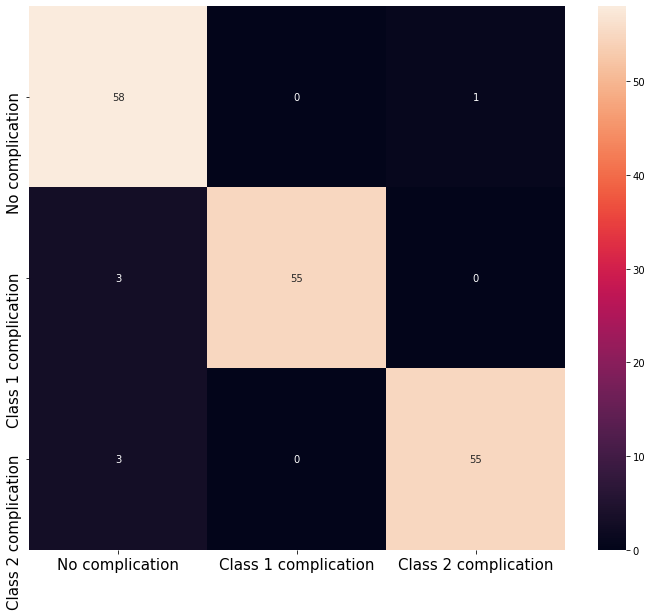

In [142]:
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='macro')
recall = recall_score(y_test, rf_predictions, average='macro')

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)
graph = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph, annot=True, ax = ax)
ax.xaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)
ax.yaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)

Model Accuracy :  0.9657142857142857
Precision on testing set: 0.9677854938271605
Recall on testing set: 0.9655172413793104


[Text(0, 0.5, 'No complication'),
 Text(0, 1.5, 'Class 1 complication'),
 Text(0, 2.5, 'Class 2 complication')]

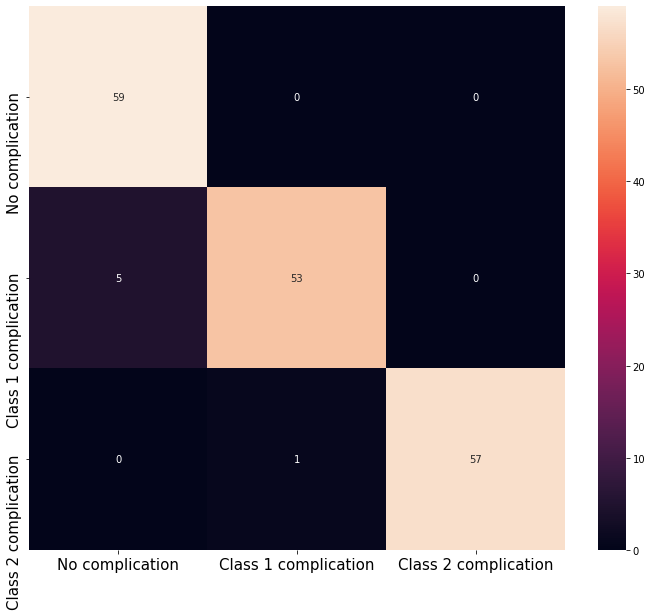

In [143]:
accuracy = accuracy_score(y_test, xb_predictions)
precision = precision_score(y_test, xb_predictions, average='macro')
recall = recall_score(y_test, xb_predictions, average='macro')

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)
graph = confusion_matrix(y_test, xb_predictions)
plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(graph, annot=True, ax = ax)
ax.xaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)
ax.yaxis.set_ticklabels(['No complication', 'Class 1 complication', 'Class 2 complication'], size=15)